# k-Nearest Neighbors

***

## Importando bibliotecas

In [19]:
# Bibliotecas de manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

In [20]:
#carregando o csv
dataset = pd.read_csv("https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/Iris.csv")

**Dataset Iris**

<img src="https://miro.medium.com/v2/resize:fit:1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png" alt="Iris" width="600"/>

In [21]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


loc (rótulos) x iloc (indíces)

In [23]:
# dataset.loc[0:5, 'SepalWidthCm']
# dataset.iloc[0:5, 1]

In [24]:
dataset.shape

(150, 5)

In [38]:
# Coluna com as features
target_col = "Species"
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset[target_col].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" % dataset.shape[0])
print("\nQuantas features existem no dataset?\n%d" % (dataset.shape[1]-1))
print("\nQue features são essas?\n%s" % (str([k for k in dataset.keys() if k != target_col])))
print("\nQual o numero de instâncias por classe?")
print(dataset[target_col].value_counts())

Quantas classes existem nesse dataset?
3

Quantas instâncias existem no dataset?
150

Quantas features existem no dataset?
4

Que features são essas?
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Qual o numero de instâncias por classe?
Species
0    50
1    50
2    50
Name: count, dtype: int64


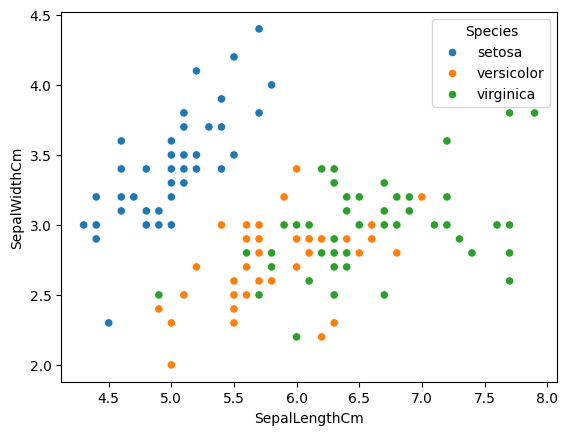

In [26]:
# Visualização dos registros considerando as features SepalLengthCm e SepalWidthCm
sns.scatterplot(data=dataset, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

# Adiciona a legenda
# plt.legend(title='Espaço de características da Sepal (Length x Width)')

# Adiciona rótulos aos eixos
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

# Exibe o gráfico
plt.show()

Para aplicar o algoritmo KNN, é necessário transformar os dados categóricos em valores numéricos!

In [27]:
pd.factorize(dataset['Species'])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

`pd.factorize` é uma função do pandas que converte valores categóricos em valores numéricos inteiros. Ela cria uma codificação numérica para cada valor único encontrado na coluna fornecida.

- Setosa - 0
- Versicolor - 1
- Virginica - 2

`pd.factorize(dataset['Species'])` retorna uma tupla:

- Um array com os valores numéricos correspondentes às categorias.
- Um array com as categorias na ordem em que foram encontradas.

In [28]:
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

### Separando o conjunto de dados 

In [29]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.loc[:,["SepalLengthCm", "SepalWidthCm"]] 
y = dataset.loc[:,["Species"]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Treinamento do modelo

In [30]:
# vamos criar um classificador kNN com k=5
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# e ver a sua performance no dataset de teste
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.69      0.50      0.58        18
           2       0.53      0.71      0.61        14

    accuracy                           0.71        45
   macro avg       0.74      0.74      0.73        45
weighted avg       0.73      0.71      0.71        45



**Métricas de avaliação**

*   **Precision** - $\frac{tp}{(tp + fp)}$
*   **Recall** - $\frac{tp}{(tp + fn)}$ 
*   **F1-score** - $2 * \frac{(precision * recall)}{(precision + recall)}$
*   **Accuracy** - $\frac{C}{T}$
*   **Macro avg** - Calcule as métricas para cada rótulo e encontre sua média não ponderada.
*   **Weighted avg** - Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo).

**tp** - verdadeiros positivos

**fp** - falsos positivos

**fn** - falsos negativos

**C** - Número de predições corretas

**T** - Número total de predições

### Região de decisão

In [31]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()

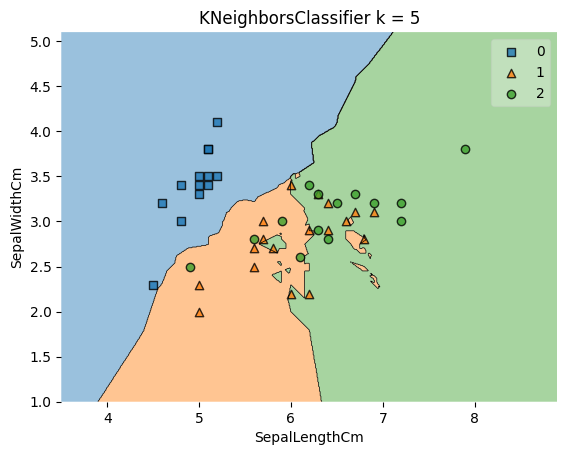

In [32]:
# região de decisão com o tamanho da vizinhança para o kNN
show_decision_region(X_test, y_test, model)

## Análise dos parâmetros

### Quanto o tamanho da vizinhança influencia?

Lembre que n_neighbors >= 1 e n_neighbors <= número de exemplos

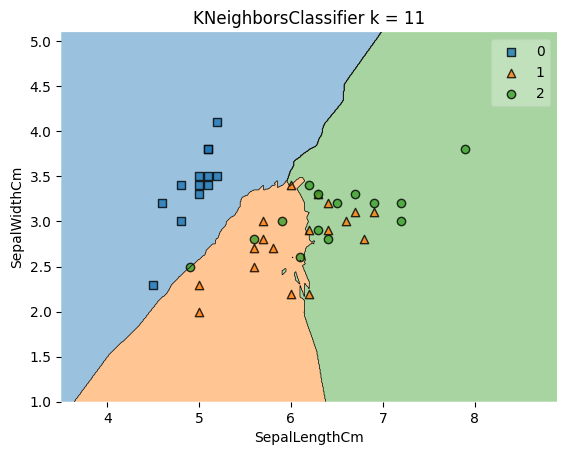

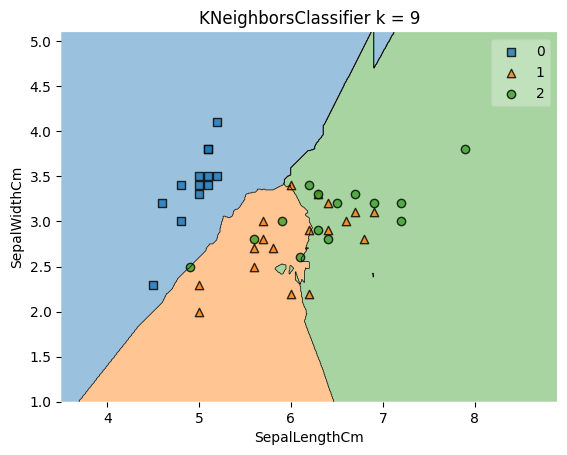

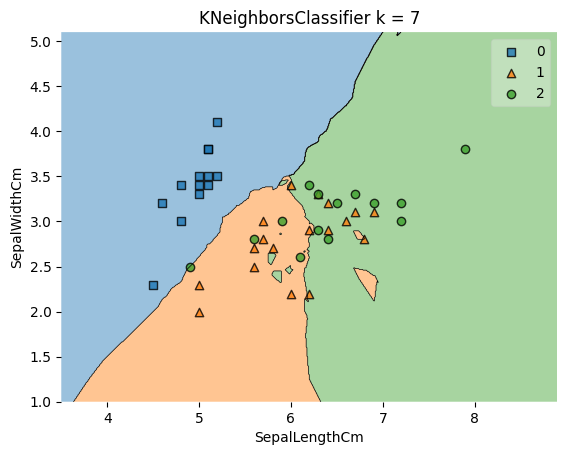

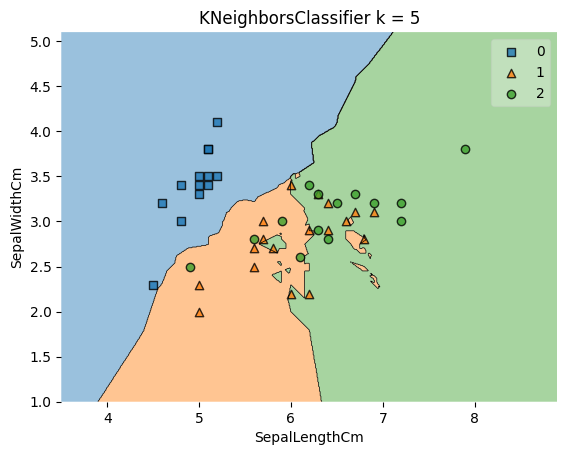

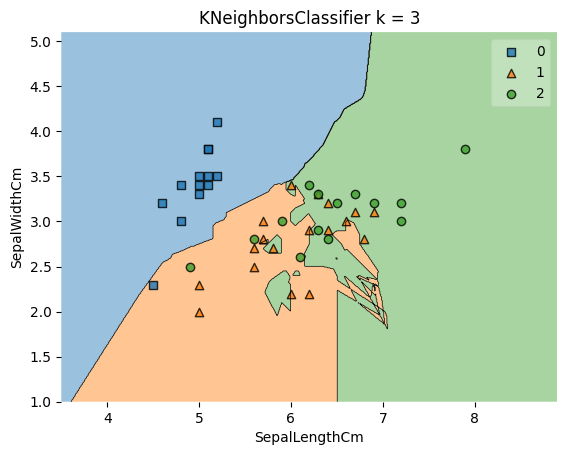

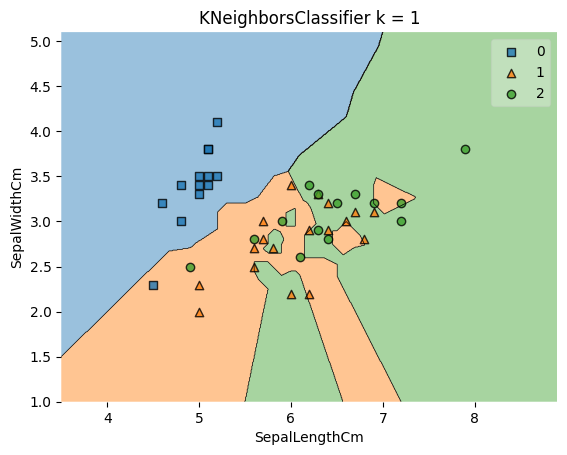

In [33]:
for k in [11, 9, 7, 5, 3, 1]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # performance no dataset de teste
    show_decision_region(X_test, y_test, model)

### Medida de distância

Também podemos mudar a métrica utilizada para calcular a distância entre as amostras.

O hiperparâmetro _metric_ pode assumir dois tipos diferentes, uma _string_ ou uma função. Caso o valor seja uma _string_, as possíveis funções de distâncias estão presentes [aqui](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html). Entretanto, você também pode criar uma função que calcula a distância entre métricas.

Vamos definir duas distâncias diferentes, a distância Euclidiana e a distância Manhattan:

- Manhattan: $D_M(x, y) = \sum_{i=1}^{d}|x_i-y_i|$

- Euclidiana: $D(x, y) = \sqrt{\sum_{i=1}^{d}(x_i-y_i)^2}$

In [36]:
# vamos implementar a distância manhattan com pesos diferentes para cada uma das features
def manhattan_custom_distance(x, y, weights=np.array([2, 1])):
    return (abs(x - y)*weights).sum()

--------------------
euclidean
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.69      0.50      0.58        18
           2       0.53      0.71      0.61        14

    accuracy                           0.71        45
   macro avg       0.74      0.74      0.73        45
weighted avg       0.73      0.71      0.71        45



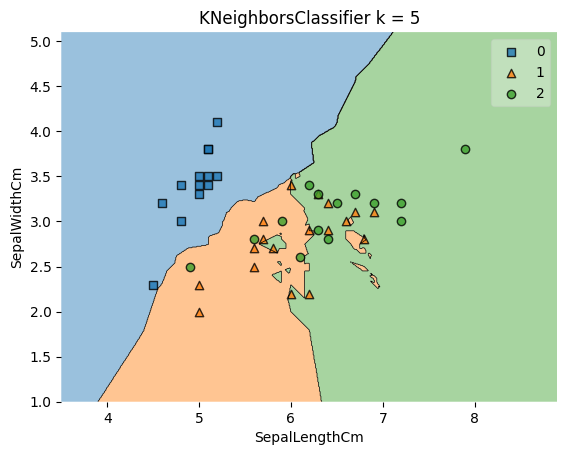

--------------------
manhattan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.71      0.56      0.62        18
           2       0.56      0.71      0.62        14

    accuracy                           0.73        45
   macro avg       0.76      0.76      0.75        45
weighted avg       0.75      0.73      0.73        45



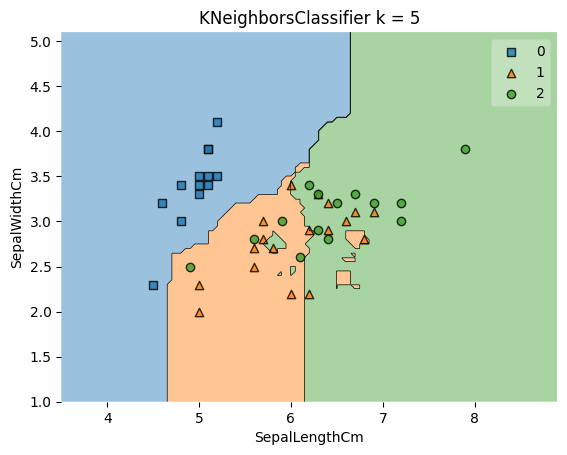

--------------------
<function manhattan_custom_distance at 0x0000014D4B51C400>
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.75      0.50      0.60        18
           2       0.53      0.71      0.61        14

    accuracy                           0.71        45
   macro avg       0.73      0.74      0.72        45
weighted avg       0.73      0.71      0.71        45



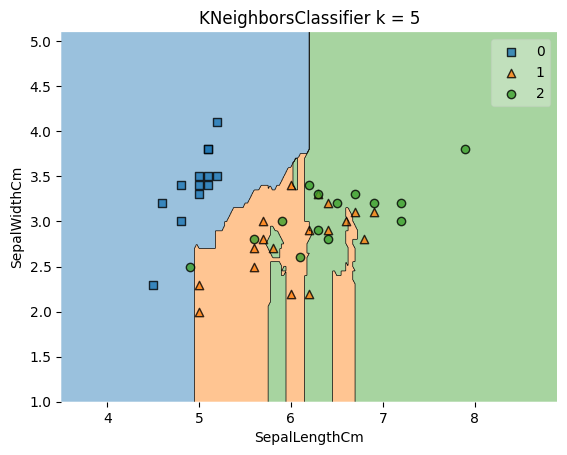

In [37]:
for m in ["euclidean", "manhattan", manhattan_custom_distance]:
    print("-"*20)
    print(str(m))

    model = KNeighborsClassifier(n_neighbors=5, metric=m)
    model.fit(X_train, y_train)

    # performance no dataset de test
    print(classification_report(y_test, model.predict(X_test)))

    show_decision_region(X_test, y_test, model)

[Veja esse KNN Interativo!](http://vision.stanford.edu/teaching/cs231n-demos/knn/)

Métrica L1 (Distância de Manhattan)

Métrica L2 (Distância Euclidiana)